In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.signal import find_peaks



In [44]:
def load_data(filename):
    df = pd.read_csv(
        filename,
        comment='#',
        delim_whitespace=True,
        encoding='latin1'  # oder alternativ: encoding='ISO-8859-1'
    )
    df.columns = ['Frequenz', 'Voltage']
    Voltage=np.array(df['Voltage'])
    Frequenz=np.array(df['Frequenz'])
    data=[Frequenz,Voltage]
    return data

filepath = '/Users/christopherwitt/F-Praktikum/NV Centers/Bestimmung der Fehler/20251029-1217-06_wainteach_gui.dat'

/var/folders/bg/b44vpd1j713_48yg885ptdvw0000gn/T/ipykernel_7005/546741595.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


Mittelwert: 3.307080
Standardabweichung: 0.000533
Minimale Abweichung: -0.002133
Maximale Abweichung: 0.001539


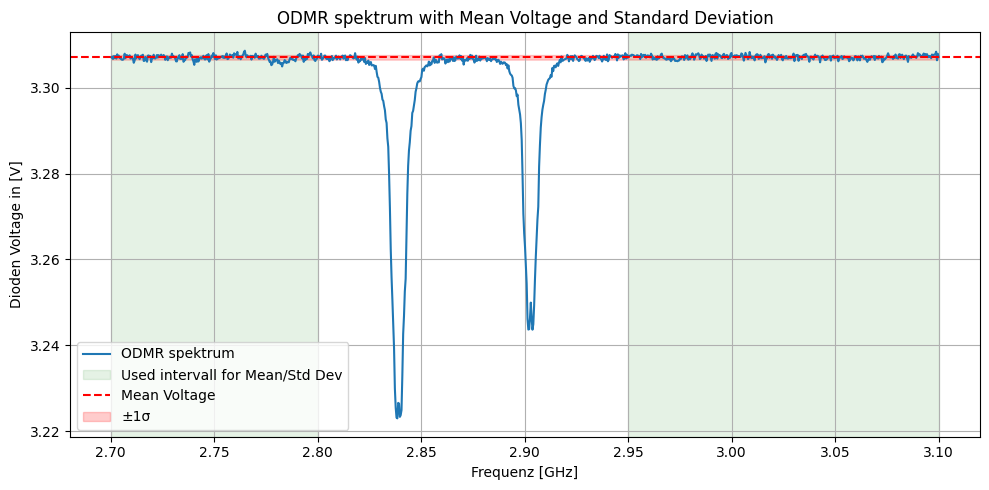

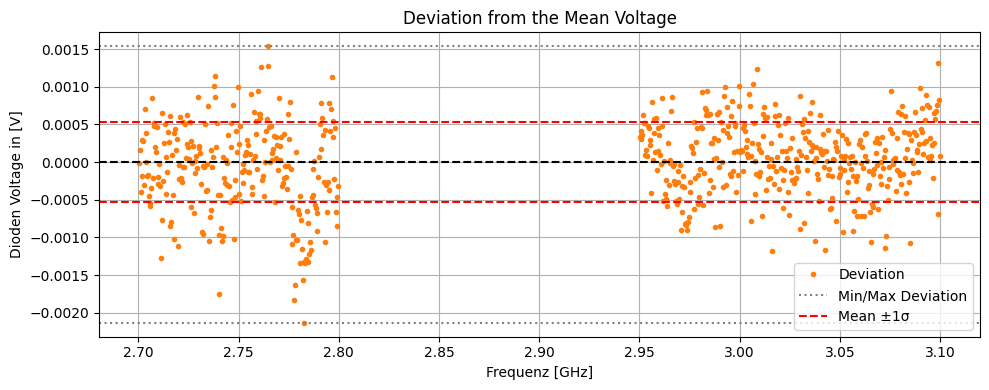

In [45]:



# === Datei einlesen ===
filepath = '/Users/christopherwitt/F-Praktikum/NV Centers/Bestimmung der Fehler/20251029-1217-06_wainteach_gui.dat'
Frequenz, Voltage = load_data(filepath)
Frequenz= Frequenz/1e9  # in GHz umrechnen
# === Bereiche definieren ===
bereich1 = (Frequenz <= 2.8)      # bis 2.8 GHz
bereich2 = (Frequenz >= 2.95)     # ab 2.95 GHz
mask = bereich1 | bereich2        # beide Bereiche kombinieren

# === Berechnungen ===
mittelwert = np.mean(Voltage[mask])
std_abw = np.std(Voltage[mask])
abweichungen = Voltage[mask] - mittelwert
min_abw = np.min(abweichungen)
max_abw = np.max(abweichungen)

print(f"Mittelwert: {mittelwert:.6f}")
print(f"Standardabweichung: {std_abw:.6f}")
print(f"Minimale Abweichung: {min_abw:.6f}")
print(f"Maximale Abweichung: {max_abw:.6f}")

# === Plot 1: Daten mit Mittelwert, σ-Bereich und eingefärbten Bereichen ===
plt.figure(figsize=(10, 5))
plt.plot(Frequenz, Voltage, label='ODMR spektrum', color='tab:blue')

# Dynamisch vom tatsächlichen Start- und Endpunkt der Daten aus einfärben
x_min = np.min(Frequenz)
x_max = np.max(Frequenz)

plt.axvspan(x_min, 2.8, color='green', alpha=0.1, label='Used intervall for Mean/Std Dev')
plt.axvspan(2.95, x_max, color='green', alpha=0.1)

# Mittelwert und Standardabweichung einzeichnen
plt.axhline(mittelwert, color='red', linestyle='--', label='Mean Voltage')
plt.fill_between(Frequenz, mittelwert - std_abw, mittelwert + std_abw,
                 color='red', alpha=0.2, label='±1σ')

plt.xlabel('Frequenz [GHz]')
plt.ylabel('Dioden Voltage in [V]')
plt.title('ODMR spektrum with Mean Voltage and Standard Deviation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot 2: Abweichungen vom Mittelwert ===
plt.figure(figsize=(10, 4))
plt.plot(Frequenz[mask], abweichungen, '.', color='tab:orange', label='Deviation')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(min_abw, color='gray', linestyle=':', label='Min/Max Deviation')
plt.axhline(max_abw, color='gray', linestyle=':')
plt.xlabel('Frequenz [GHz]')
plt.ylabel('Dioden Voltage in [V]')
plt.title('Deviation from the Mean Voltage')
#standartabwiechung 
plt.axhline(std_abw, color='red', linestyle='--', label='Mean ±1σ')
plt.axhline(-1*std_abw, color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
